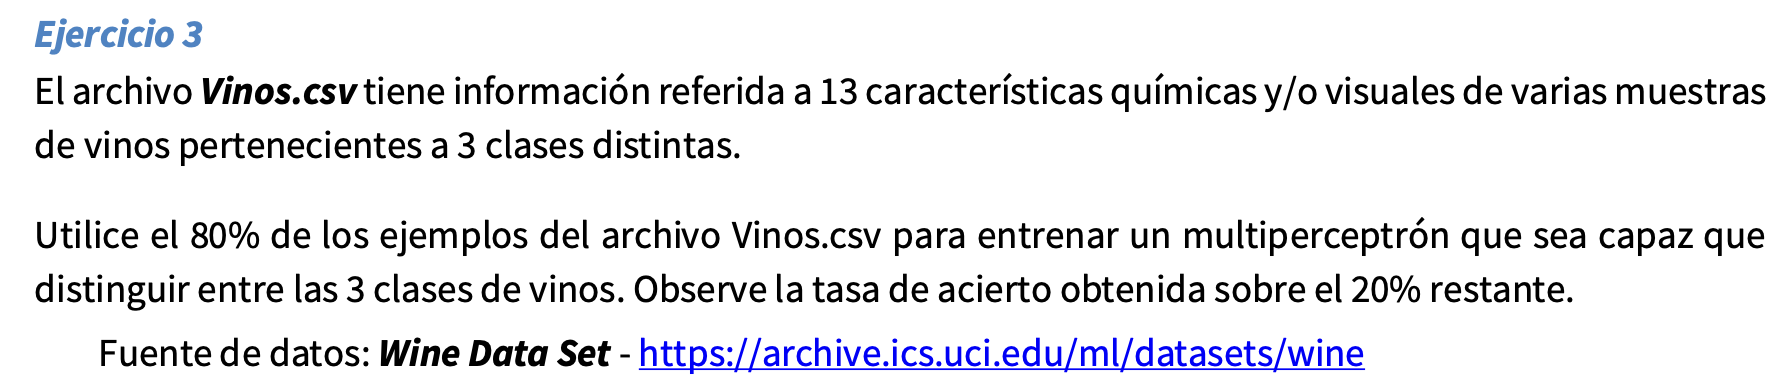

In [31]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [32]:
import chardet
import pandas as pd
nombre_archivo = DATOS_DIR + 'Vinos.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'], sep=";")

# visualiza el dataframe

df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
df.Class.unique()

array([1, 2, 3], dtype=int64)

In [34]:
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

In [35]:
X = np.array(df.iloc[:,1:])
T = np.array(df.iloc[:,:1])

In [36]:
binarizer = preprocessing.LabelBinarizer() #para el onehot enconding
T = binarizer.fit_transform(T)
# print(T)

X_train, X_test, T_train, T_test = model_selection.train_test_split(X, T, test_size=0.2)#, random_state=42)
# print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(T_train), len(T_test) ))

scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()

X_train  = scaler.fit_transform( X_train )
X_test   = scaler.transform( X_test )

# print(X_train)

In [37]:
#elijo parámetros de entrenamiento simialres a los que mostró el profe, siempre usando cosas que vimos por el momento.  Relu es el mejor

modelo = MLPClassifier(
    hidden_layer_sizes=(2),
    tol=1.0e-4,
    activation='relu',          # aguante relu, sklearn no tiene leaky relu
    solver='adam',              # todavía no vimos esto, pero el profe lo puso
    alpha=0.005,
    max_iter=2500,                        
).fit(X_train, T_train)

In [38]:
Y_pred = modelo.predict(X_train)
score = modelo.score(X_train, T_train)

# # "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(T_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# Y_pred_it = np.argmax(Y_pred, axis = 1)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )
print(Y_pred_it)

Efectividad:  98.59%
      Score:   0.99
[2 1 1 3 3 2 3 3 3 1 1 1 2 2 3 3 1 1 2 2 2 2 2 1 2 3 1 1 1 1 2 1 1 1 2 2 3
 1 3 2 2 2 2 3 2 2 1 1 1 2 1 3 2 3 1 1 3 3 1 2 2 1 2 3 1 1 2 3 3 3 2 2 3 2
 1 3 3 2 3 3 3 3 3 2 2 2 1 1 2 2 2 3 1 3 2 1 3 2 1 1 3 1 3 1 1 1 3 3 3 2 1
 3 2 3 2 2 1 3 2 2 2 2 1 3 2 1 1 2 1 2 1 2 1 1 2 2 3 1 1 3 3 1]


In [39]:
Y_pred = modelo.predict(X_test)
score = modelo.score(X_test, T_test)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(T_test)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )

Efectividad:  86.11%
      Score:   0.86


## Hay resultados similares con 2, 3, 4 y 5 capas asi que me quedo con 2